In [1]:
%matplotlib inline

# dataframes and arrays
import pandas as pd, numpy as np

# for plotting
import matplotlib.pyplot as plt 


/var/folders/23/p99d2kmd0vlg5qrqb4vq2q840000gn/T/ipykernel_75887/1620182627.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd, numpy as np


In [2]:
from scipy.special import erf
def costa_(xi, PHY, PHY_C, gamma, A=13.0, B=2.5):
    
    delta = A - gamma
    phy = PHY/PHY_C
    
    F = (1-xi)*erf((np.sqrt(np.pi)/(2*(1-xi)))*phy*(1+phy**gamma))
    
    num = 1+phy**delta
    denom = (1-F)**(B*PHY_C)
    
    return num/denom



# 55 CANCRI MAP TREATMENT

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
# load the image and convert into
# numpy array
profile = load_img('./data/cancri_profile.png')

# details about the image printed below
print(type(profile)) 
print(profile.format)
print(profile.mode)
print(profile.size)

# 7 8 2130 11
profile = profile.crop((7,8,2130,9))
profile

# convert the given image into  numpy array
profile_array = img_to_array(profile).squeeze(axis=0)
print("Image is converted and NumPy array information :")
print(type(profile_array))
print("type:", profile_array.dtype)
print("shape:", profile_array.shape)

<class 'PIL.Image.Image'>
None
RGB
(2134, 38)
Image is converted and NumPy array information :
<class 'numpy.ndarray'>
type: float32
shape: (2123, 3)


In [5]:
# now we load and process the color bar
# load the image and convert into
scale = load_img('./data/cancri_colorscale.png')

# details about the image printed below
print(type(scale)) 
print(scale.format)
print(scale.mode)
print(scale.size)


# 7 8 2130 11
scale = scale.crop((0,10,1,1343))
scale.show()
#scale

<class 'PIL.Image.Image'>
None
RGB
(30, 1346)



(eog:480857): GdkPixbuf-CRITICAL **: 16:39:46.730: gdk_pixbuf_scale_simple: assertion 'dest_width > 0' failed

(eog:480857): EOG-WARNING **: 16:39:46.731: Thumbnail creation failed


Image is converted and NumPy array information :
<class 'numpy.ndarray'>
type: float32
shape: (1333, 3)


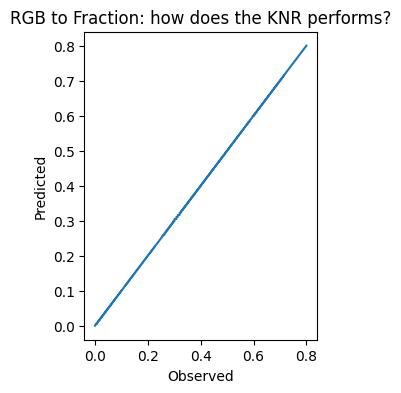

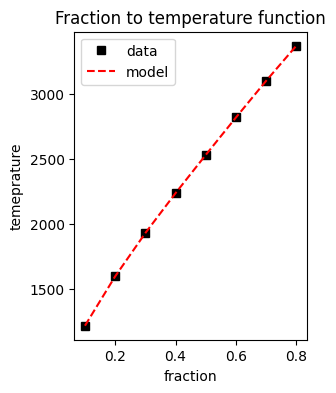

In [6]:
# convert the given image into  numpy array
scale_array = img_to_array(scale).squeeze(axis=1)
print("Image is converted and NumPy array information :")
print(type(scale_array))
print("type:", scale_array.dtype)
print("shape:", scale_array.shape)


#
# NOW WE NEED TO MAP THE COLORBAR TO FRACTION (left color bar in Demory figure)
#
frac = np.linspace(0.8, 0., scale_array.shape[0])

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# we use a nearest neighbors algorithm to map RGB to fraction
clf = KNeighborsRegressor(n_neighbors=10, weights='distance')
clf.fit(scale_array, frac)

plt.figure(figsize=(3,4))
plt.plot(frac, clf.predict(scale_array))
plt.title("RGB to Fraction: how does the KNR performs?")
plt.xlabel("Observed")
plt.ylabel("Predicted")

#
# NOW WE MAKE A FUNCTION THAT CONVERT FRACTIONS INTO TEMPERATURE
#
# the lowest point is 0 K but is excluded here, and the highest 3370 K
grey_axis = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
T_K = [1220, 1600, 1930, 2240, 2530, 2820, 3100, 3370]

# we thus train a simple polynome to reproduce that
p_ = np.polyfit(grey_axis, T_K, 4)

plt.figure(figsize=(3,4))
plt.plot(grey_axis, T_K, "ks", label="data")
plt.plot(grey_axis, np.polyval(p_, grey_axis), "r--", label="model")
plt.title("Fraction to temperature function")
plt.xlabel("fraction")
plt.ylabel("temeprature")
plt.legend()

# so now we can convert our 

2123


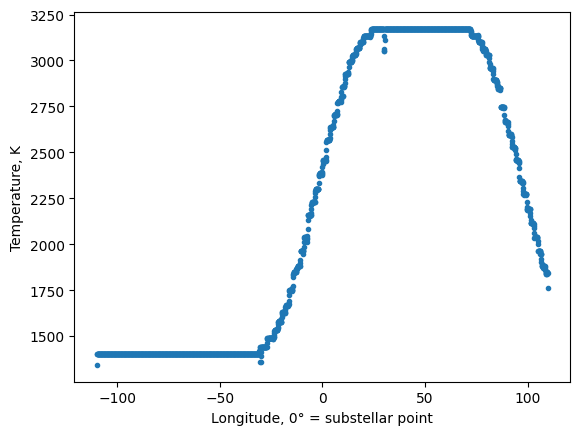

In [7]:
# 
# NOW WE CONVERT THE COLOR PROFILE INTO A TEMPERATURE PROFILE
#
profile_fraction = clf.predict(profile_array)
profile_temperature = np.polyval(p_, profile_fraction)

# linearly spaced profile (approximation)
Longitude_axis = np.linspace(-109.8, 109.8, len(profile_array))
print(len(profile_array))

plt.figure()
plt.plot(Longitude_axis, profile_temperature, ".")
plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("Temperature, K")

# saving the array for imelt
np.save("./data/T_cancri.npy", profile_temperature)


# Calculate viscosity for Cancri

# we load the result (see in imelt folder for the calculation)


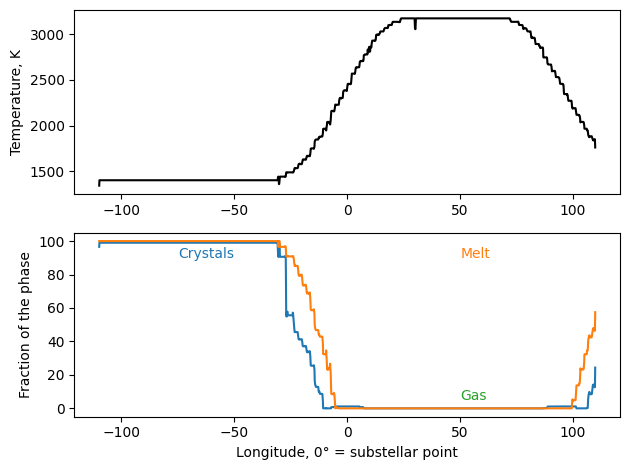

In [9]:
Cancri_result = pd.read_csv("./data/Cancri_calcul.csv")
Cancri_result_CA = pd.read_csv("./data/Cancri_calcul_CA.csv")

plt.figure()
plt.subplot(2,1,2)
plt.plot(Longitude_axis, Cancri_result.loc[:,"prct_c"], "-")
#plt.plot(Longitude_axis, Cancri_result.loc[:,"prct_l"], "-")
#plt.plot(Longitude_axis, Cancri_result.loc[:,"prct_g"], "-")

plt.plot(Longitude_axis, Cancri_result_CA.loc[:,"prct_c"]*100, "-")
#plt.plot(Longitude_axis, Cancri_result_CA.loc[:,"prct_l"]*100, "-")
plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("Fraction of the phase")
plt.annotate("Crystals", xy=(-75, 90), xycoords="data", color="C0")
plt.annotate("Melt", xy=(50, 90), xycoords="data", color="C1")
plt.annotate("Gas", xy=(50, 5), xycoords="data", color="C2")

plt.subplot(2,1,1)
plt.plot(Longitude_axis, profile_temperature, "k-", ms=1)
#plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("Temperature, K")
plt.tight_layout()
plt.savefig("./figures/Cancri_Temperature_profile.pdf")

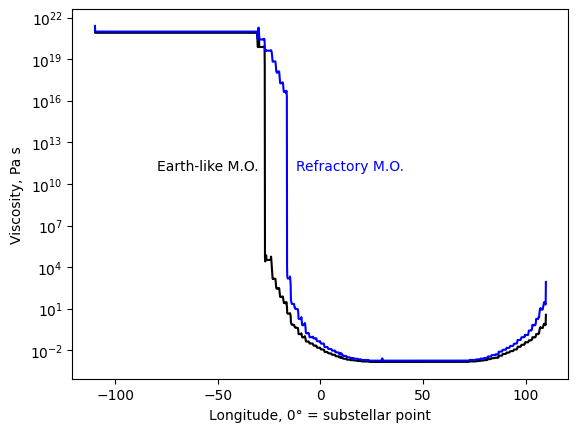

In [11]:
# we use a nearest neighbors algorithm to map RGB to fraction
interp = KNeighborsRegressor(n_neighbors=4, weights='distance')

visco_ = Cancri_result.loc[:,"Cancri_visco"]
ctx_ = Cancri_result.loc[:,"prct_c"]

#clf.fit(Longitude_axis, visco_)

#Longitude = np.arange(Longitude_axis.min(), Longitude_axis.max(), 

plt.figure()
plt.plot(Longitude_axis, 10**visco_, "k-")
plt.plot(Longitude_axis, 10**Cancri_result_CA.Cancri_visco, "b-")
plt.annotate("Earth-like M.O.", xy=(-30,10**11), xycoords="data", color="k", ha="right")
plt.annotate("Refractory M.O.", xy=(-12,10**11), xycoords="data", color="b")
plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("Viscosity, Pa s")
plt.yscale("log")
plt.savefig("./figures/Cancri_Temperature_profile.pdf")

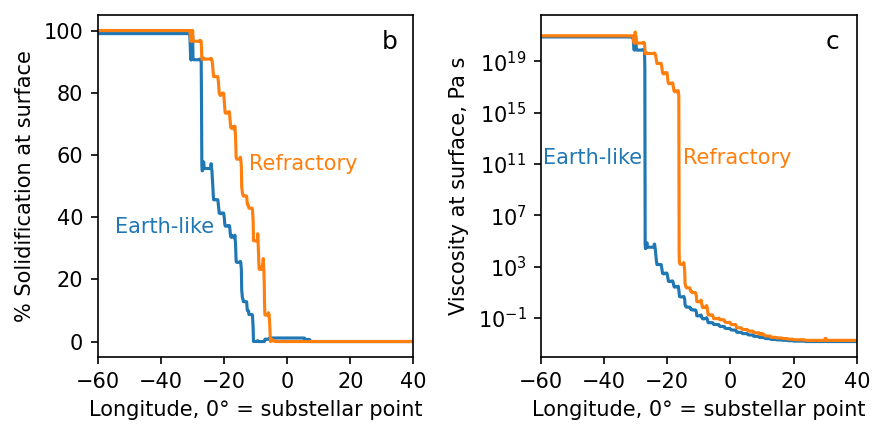

In [12]:
plt.figure(figsize=(6,3), dpi=150)
plt.subplot(1,2,1)
plt.plot(Longitude_axis, Cancri_result.loc[:,"prct_c"], "-", color="C0")
plt.plot(Longitude_axis, Cancri_result_CA.loc[:,"prct_c"]*100, "-", color="C1")
plt.annotate("Earth-like", xy=(-23,35), xycoords="data", color="C0", ha="right")
plt.annotate("Refractory", xy=(-12,55), xycoords="data", color="C1")
plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("% Solidification at surface")
plt.annotate("b", xy=(0.9,0.9), xycoords="axes fraction", fontsize=12)
plt.xlim(-60,40)

plt.subplot(1,2,2)
plt.plot(Longitude_axis, 10**visco_, "-", color="C0")
plt.plot(Longitude_axis, 10**Cancri_result_CA.Cancri_visco, "-", color="C1")
plt.annotate("Earth-like", xy=(-28,10**11), xycoords="data", color="C0", ha="right")
plt.annotate("Refractory", xy=(-15,10**11), xycoords="data", color="C1")
plt.xlabel("Longitude, 0° = substellar point")
plt.ylabel("Viscosity at surface, Pa s")
plt.yscale("log")
plt.annotate("c", xy=(0.9,0.9), xycoords="axes fraction", fontsize=12)
plt.xlim(-60,40)
plt.tight_layout()
plt.savefig("./figures/Cancri_percent_solidification.pdf")